In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
class Particle:
    def __init__(self, x, y, vx, vy, Fx=0, Fy=0, Dvx=0, Dvy=0, c_x=0, W=0):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx = Fx
        self.Fy = Fy
        self.Dvx = Dvx
        self.Dvy = Dvy
        self.c_x = c_x
        self.W = W

    def reset_F(self):
        self.Fx = 0
        self.Fy = 0

    def add_F(self, Fx, Fy):
        self.Fx += Fx
        self.Fy += Fy

In [3]:
class lf_integrator:
    def __init__(self, dti, fi, Ti):
        self.dt = dti
        self.f = fi
        self.T = Ti
        self.bonded = False
        self.total_work = 0 

    def initialize_v(self, particles):
        for p in particles:
            p.vx += 0.5 * self.dt * p.Fx
            p.vy += 0.5 * self.dt * p.Fy

    def update_F(self, particles, k):
        for p in particles:
            p.reset_F()
            F = -k * (p.x - p.c_x)
            p.add_F(F, 0)

    def update_v1(self, particles):
        for p in particles:
            p.vx += self.dt * p.Fx
            p.vy += self.dt * p.Fy

    def impulse_Dv(self, particles):
        for p in particles:
            eta = np.random.normal(0, 1)
            p.Dvx = -self.f * p.vx + math.sqrt(self.f * (2 - self.f) * self.T) * eta

    def update_x(self, particles, k):
        for p in particles:
            dx = self.dt * (p.vx + 0.5 * p.Dvx)
            dy = self.dt * (p.vy + 0.5 * p.Dvy)
            p.x += dx
            p.y += dy
            particle_work = k * (p.x - p.c_x) * dx  # Calcular el trabajo realizado por la partícula
            p.W += particle_work  # Actualizar el trabajo de la partícula
            self.total_work += particle_work

    def update_v2(self, particles):
        for p in particles:
            p.vx += p.Dvx
            p.vy += p.Dvy
            

# ciclos de Stirling a diferentes tiempos 

# *400 segundos 

In [8]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(400 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 100:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.02 * (time)
    
    elif 100 <= time <= 200:
        integrator.T = 50.0 - 0.4 * (time -100) 
        integrator.k = 0.1
    
    elif 200 < time <= 300:
        integrator.T = 10  
        integrator.k =  0.1 + 0.02 * (time - 200)  
    
    elif 300 <= time <= 400:
        integrator.T = 10 + 0.4 * (time - 300)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)


Trabajo total del sistema: 57758.385336234714


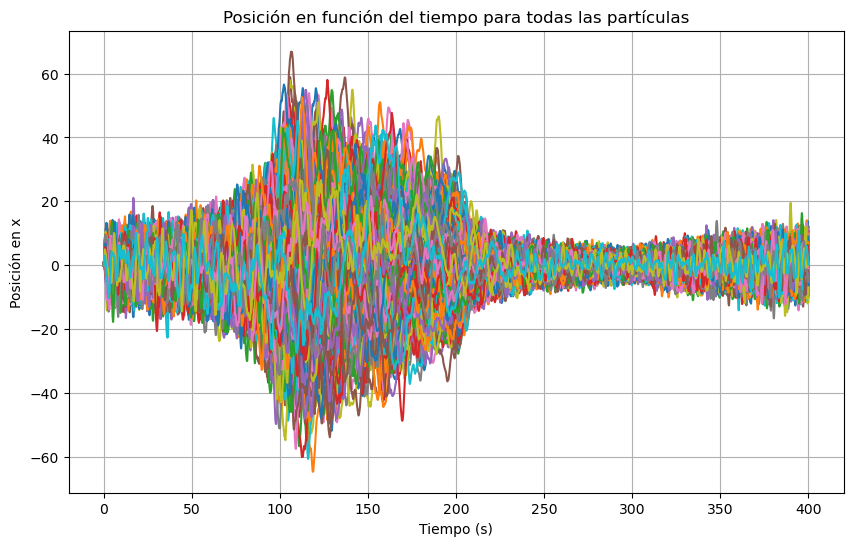

In [9]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()


### *2000 segundos 

In [6]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(2000 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 500:
        integrator.T = 50.0  # T crece linealmente en el intervalo [0, 50]
        integrator.k = 2.1 - 0.004 * (time)
    
    elif 500 <= time <= 1000:
        integrator.T = 50.0 - 0.08 * (time -500)  # Mantener constante T en el intervalo (50, 100]
        integrator.k = 0.1 # Mantener constante k en el intervalo [0, 50]
    
    elif 1000 < time <= 1500:
        integrator.T = 10  # T crece linealmente en el intervalo [0, 50]
        integrator.k =  0.1 + 0.004 * (time - 1000)  # k crece linealmente en el intervalo (50, 100]
    
    elif 1500 <= time <= 2000:
        integrator.T = 10 + 0.08 * (time - 1500)  # Mantener constante T en el intervalo (50, 100]
        integrator.k = 2.1  # Mantener constante k en el intervalo [0, 50]
    
    #elif 400 < time <= 500:
     #   integrator.T = 100 - 0.9 * (time - 400)  # Mantener constante T en el intervalo (50, 100]
      #  integrator.k = 0.1  # k crece linealmente en el intervalo (50, 100]

    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
    
    if time % 100 == 0 and step >= 0:  # Calcular el trabajo cada 100 pasos
        interval_work = np.sum(work[:, step - 100:step])
        interval_works.append(interval_work)

# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)


for i, interval_work in enumerate(interval_works):
    print(f"Trabajo en intervalo {i + 1}: {interval_work}")

Trabajo total del sistema: 192373.11821768107
Trabajo en intervalo 1: 0.0
Trabajo en intervalo 2: 3336050.816965825
Trabajo en intervalo 3: 5490913.156947172
Trabajo en intervalo 4: 7168583.892391874
Trabajo en intervalo 5: 8517907.2883915
Trabajo en intervalo 6: 10013321.771225454
Trabajo en intervalo 7: 10081659.476292897
Trabajo en intervalo 8: 10050253.507216653
Trabajo en intervalo 9: 10005225.995703937
Trabajo en intervalo 10: 9976331.191414412
Trabajo en intervalo 11: 9840049.179331208
Trabajo en intervalo 12: 9674394.639718518
Trabajo en intervalo 13: 9727419.40342149
Trabajo en intervalo 14: 9928061.230748253
Trabajo en intervalo 15: 10270023.14723001
Trabajo en intervalo 16: 10729139.532701904
Trabajo en intervalo 17: 11592846.122327255
Trabajo en intervalo 18: 12871003.768945009
Trabajo en intervalo 19: 14568574.45014492
Trabajo en intervalo 20: 16596272.257259341


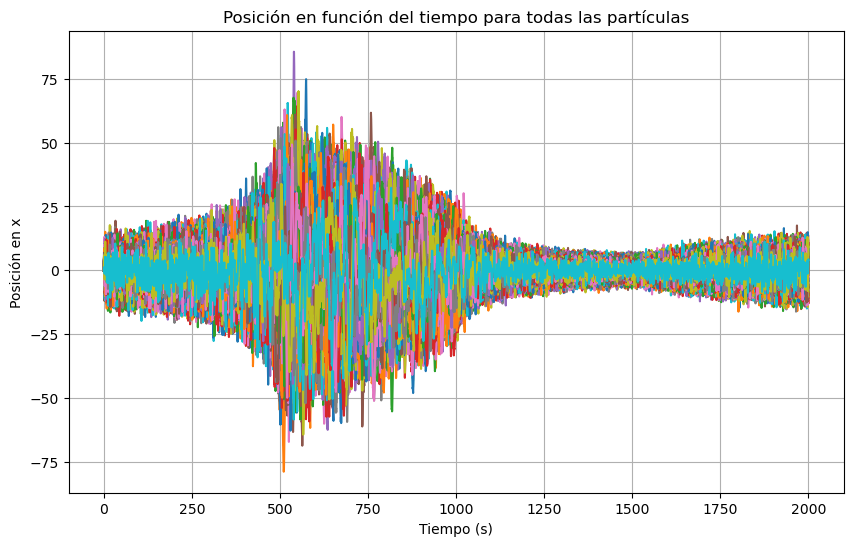

In [7]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()


### 40 segundos 

In [18]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(40 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 10:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.2 * (time)
    
    elif 10 <= time <= 20:
        integrator.T = 50.0 - 4 * (time -10) 
        integrator.k = 0.1
    
    elif 20 < time <= 30:
        integrator.T = 10  
        integrator.k =  0.1 + 0.2 * (time - 20)  
    
    elif 30 <= time <= 40:
        integrator.T = 10 + 4 * (time - 30)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 9426.60897945688


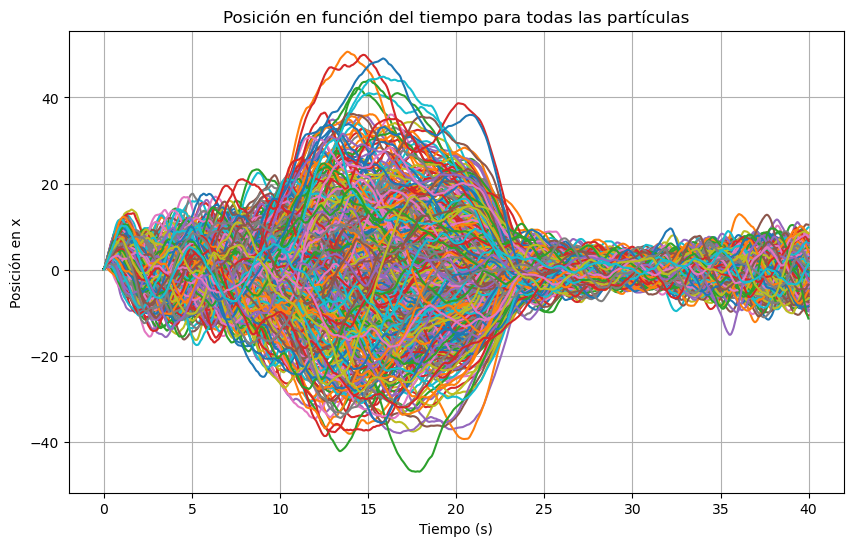

In [19]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

### 4000 segundos 

In [13]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(4000 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 1000:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.002 * (time)
    
    elif 1000 <= time <= 2000:
        integrator.T = 50.0 - 0.04 * (time -1000) 
        integrator.k = 0.1
    
    elif 2000 < time <= 3000:
        integrator.T = 10  
        integrator.k =  0.1 + 0.002 * (time - 2000)  
    
    elif 3000 <= time <= 4000:
        integrator.T = 10 + 0.04 * (time - 3000)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 358759.1738005389


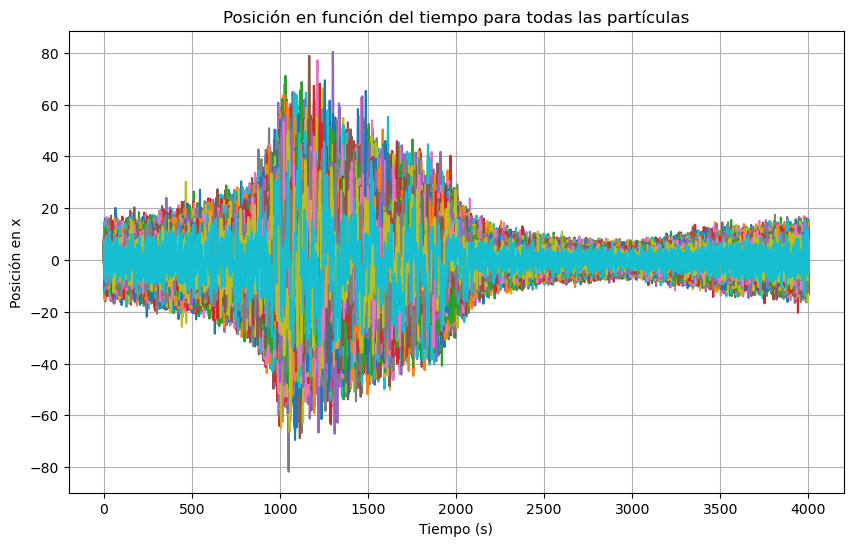

In [14]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

### 200 segundos 

In [10]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(200 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 50:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.04 * (time)
    
    elif 50 <= time <= 100:
        integrator.T = 50.0 - 0.8 * (time -50)  
        integrator.k = 0.1 
    
    elif 100 < time <= 150:
        integrator.T = 10  
        integrator.k =  0.1 + 0.04 * (time - 100)  
    
    elif 150 <= time <= 200:
        integrator.T = 10 + 0.8 * (time - 150)  
        integrator.k = 2.1  

    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
    

# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 39499.435192451994


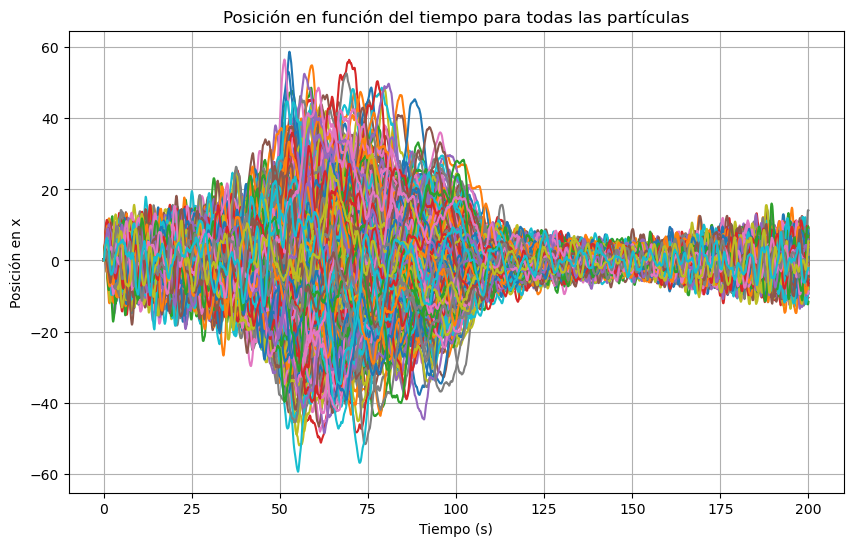

In [11]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

### * 20 segundos 

In [8]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 1000
total_steps = int(20 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 5:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.4 * (time)
    
    elif 5 <= time <= 10:
        integrator.T = 50.0 - 8 * (time -5)  
        integrator.k = 0.1 
    
    elif 10 < time <= 15:
        integrator.T = 10  
        integrator.k =  0.1 + 0.4 * (time - 10)  
    
    elif 15 <= time <= 20:
        integrator.T = 10 + 8 * (time - 15)  
        integrator.k = 2.1  

    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
    

# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: -16006.076962773706


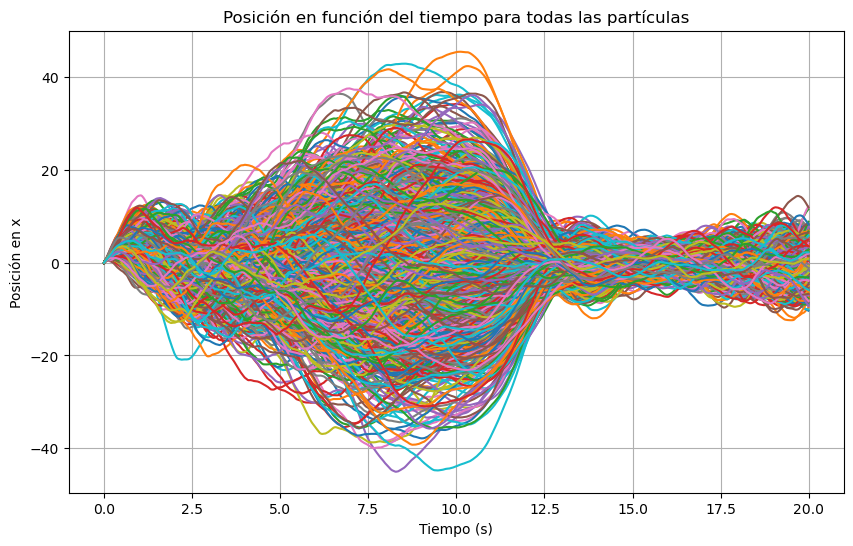

In [9]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

# **** 8000 segundos :0

In [23]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(8000 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 2000:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.001 * (time)
    
    elif 2000 <= time <= 4000:
        integrator.T = 50.0 - 0.02 * (time -2000) 
        integrator.k = 0.1
    
    elif 4000 < time <= 6000:
        integrator.T = 10  
        integrator.k =  0.1 + 0.001 * (time - 4000)  
    
    elif 6000 <= time <= 4000:
        integrator.T = 10 + 0.02 * (time - 6000)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 473978.056581757


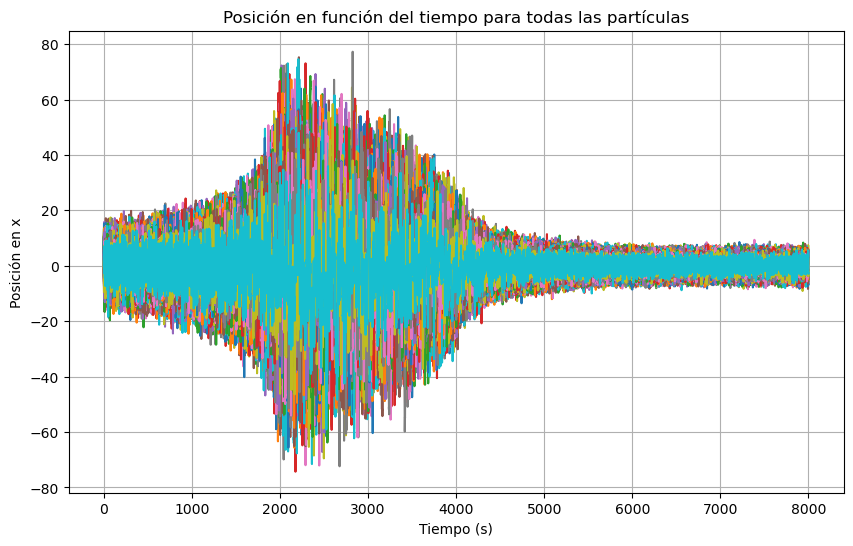

In [24]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

# * 800 SEGUNDOS

In [25]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(800 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 200:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.01 * (time)
    
    elif 200 <= time <= 400:
        integrator.T = 50.0 - 0.2 * (time -200) 
        integrator.k = 0.1
    
    elif 400 < time <= 600:
        integrator.T = 10  
        integrator.k =  0.1 + 0.01 * (time - 400)  
    
    elif 600 <= time <= 400:
        integrator.T = 10 + 0.2 * (time - 600)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 65754.5284944876


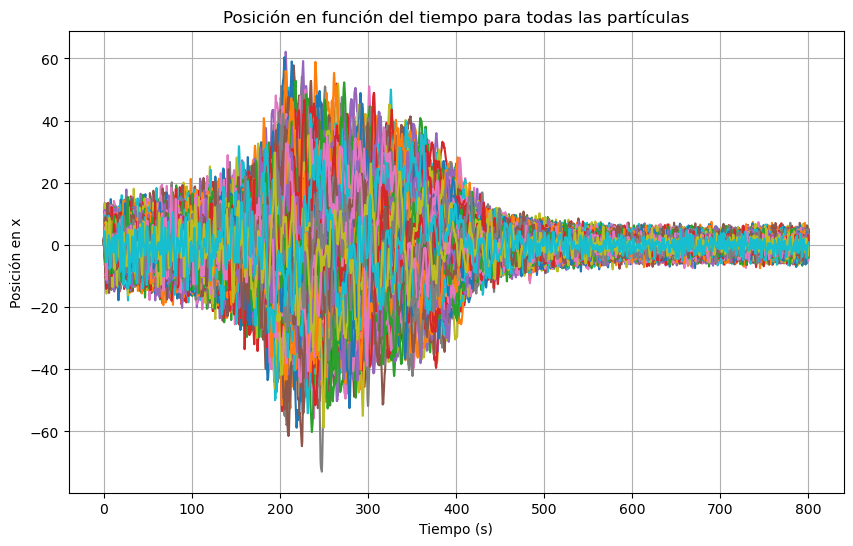

In [26]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

### 80 SEGUDOS

In [21]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(80 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 20:
        integrator.T = 50.0  
        integrator.k = 2.1 - 0.1 * (time)
    
    elif 20 <= time <= 40:
        integrator.T = 50.0 - 2 * (time -20) 
        integrator.k = 0.1
    
    elif 40 < time <= 60:
        integrator.T = 10  
        integrator.k =  0.1 + 0.1 * (time - 40)  
    
    elif 60 <= time <= 40:
        integrator.T = 10 + 2 * (time - 60)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

        
        
        
        
        
        
        
    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 15799.959860903156


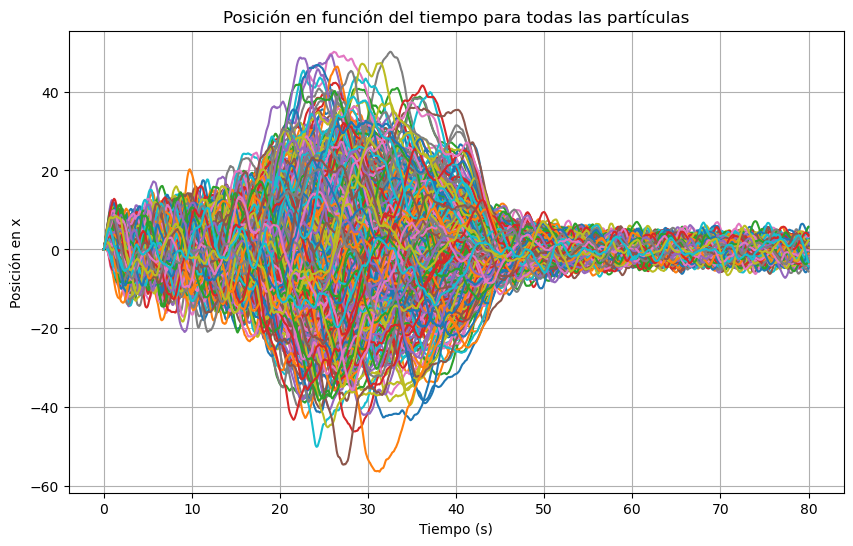

In [22]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

### 1000 segundos 

In [27]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(1000 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 250:
        integrator.T = 50.0  
        integrator.k = 2.1 - (1/125) * (time)
    
    elif 250 <= time <= 500:
        integrator.T = 50.0 - (4/25) * (time -250) 
        integrator.k = 0.1
    
    elif 500 < time <= 750:
        integrator.T = 10  
        integrator.k =  0.1 + (1/125) * (time - 500)  
    
    elif 750 <= time <= 1000:
        integrator.T = 10 + (4/25) * (time - 750)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 109390.89558822691


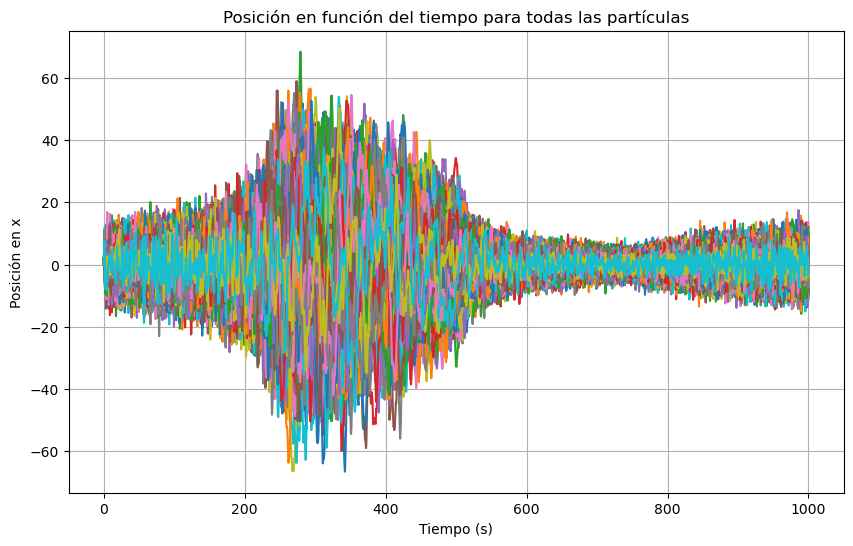

In [28]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

# 100 segundos 

In [29]:
dt = 0.01
gamma = 1
f = 1 - np.exp(-dt * gamma)
num_particles = 500
total_steps = int(100 / dt)
T=50
interval_works = []

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))
work = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    time = step * dt

    # Actualizar la temperatura T y la constante k en diferentes intervalos de tiempo
    if 0 <= time <= 25:
        integrator.T = 50.0  
        integrator.k = 2.1 - (2/25) * (time)
    
    elif 25 <= time <= 50:
        integrator.T = 50.0 - (8/5) * (time -25) 
        integrator.k = 0.1
    
    elif 50 < time <= 75:
        integrator.T = 10  
        integrator.k =  0.1 + (2/25) * (time - 50)  
    
    elif 75 <= time <= 100:
        integrator.T = 10 + (8/5) * (time - 75)  
        integrator.k = 2.1 
    
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx
        work[i, step] = p.W

    integrator.initialize_v(particles)
    integrator.update_F(particles, integrator.k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, integrator.k)
    integrator.update_v2(particles)
        
# Calcular y mostrar el trabajo total del sistema
total_work = integrator.total_work
print("Trabajo total del sistema:", total_work)

Trabajo total del sistema: 26697.451121576352


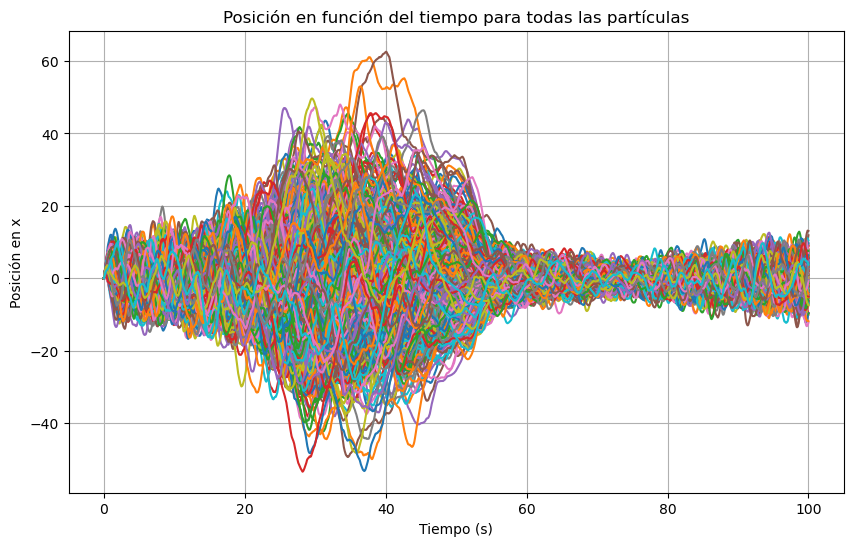

In [30]:
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i, :], label=f'Partícula {i}')

plt.title('Posición en función del tiempo para todas las partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x')
#plt.legend()
plt.grid(True)
plt.show()

# Grafico de trabajo para diferentes tiempos 

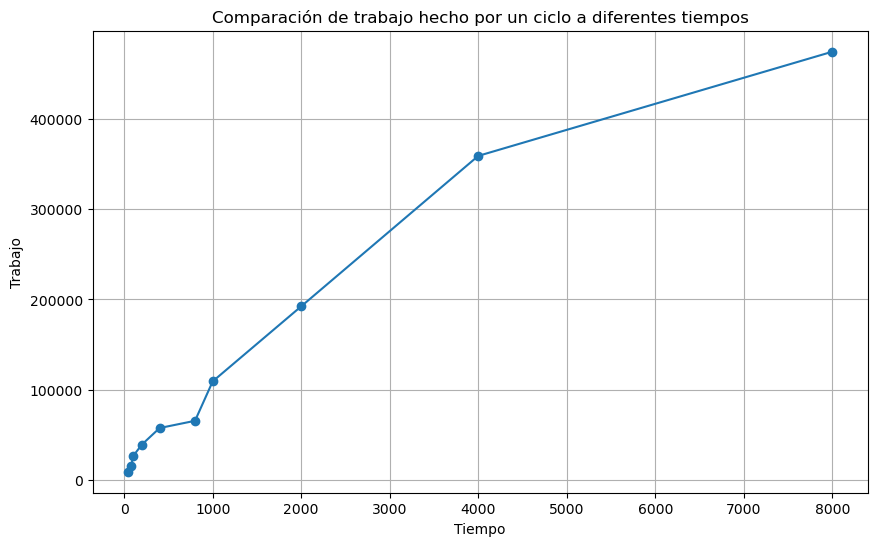

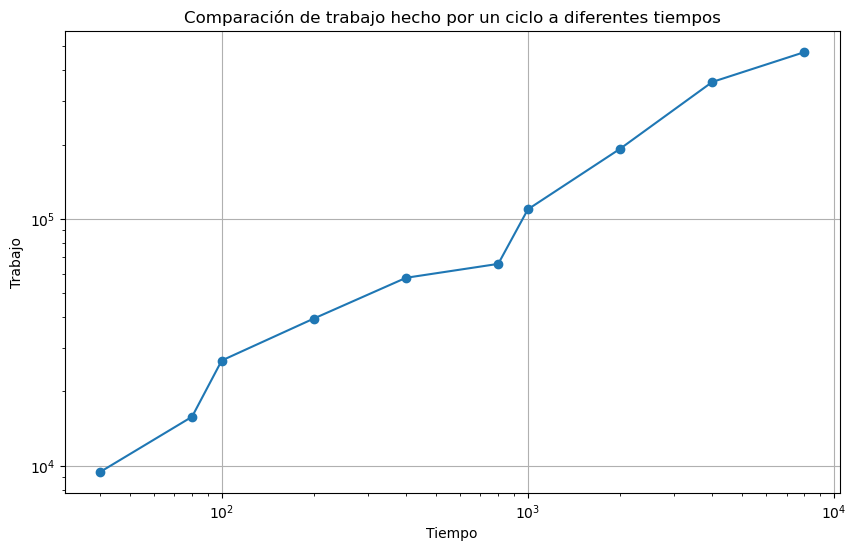

In [2]:
valores_x = [1, 2, 3, 4, 5]
valores_x = [40, 80,
             100, 200, 400, 800,
             1000, 2000, 4000, 8000]

valores_y = [9426.61, 15799.96,
             26697.45, 39499.435, 57758.39, 65754.52,
             109390.90, 192373.12, 358759.17, 473978.06]


df = pd.DataFrame({'X': valores_x, 'Y': valores_y})

# Crear el gráfico 
plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Trabajo')
plt.title('Comparación de trabajo hecho por un ciclo a diferentes tiempos')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.loglog(df['X'], df['Y'], marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Trabajo')
plt.title('Comparación de trabajo hecho por un ciclo a diferentes tiempos loglog')
plt.grid(True)
plt.show()

